In [22]:
import praw
import pandas as pd
import datetime

# Conectar con Reddit usando PRAW
reddit = praw.Reddit("CREDENCIALES")

# Extraer datos de un subreddit
subreddit = reddit.subreddit('lies')
posts = []
for post in subreddit.new(limit=500000):  # Extraer top 5000 publicaciones
    posts.append([post.title, post.score, post.id, post.subreddit, post.num_comments, 
                  post.selftext, post.created, post.author, post.upvote_ratio])

# Convertir los datos a un DataFrame
df = pd.DataFrame(posts, columns=['title', 'score', 'id', 'subreddit', 'num_comments', 
                                  'body', 'created', 'author', 'upvote_ratio'])

# Convertir la columna 'created' a formato de fecha
df['created'] = pd.to_datetime(df['created'], unit='s')

# Mostrar las primeras filas
df.head()


AttributeError: 'NoneType' object has no attribute 'name'

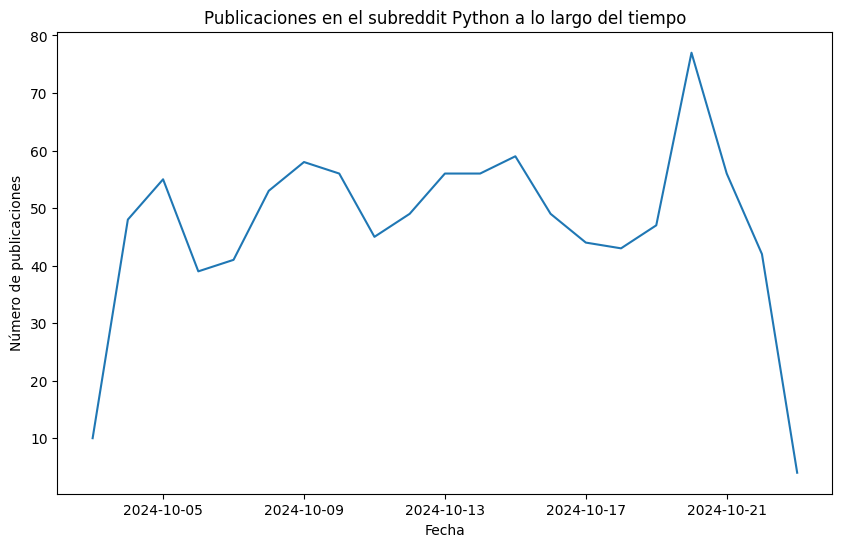

In [15]:
import matplotlib.pyplot as plt

# Contar el número de publicaciones por fecha
df['date'] = df['created'].dt.date
posts_per_day = df.groupby('date').size()

# Graficar la cantidad de publicaciones a lo largo del tiempo
plt.figure(figsize=(10,6))
posts_per_day.plot()
plt.title('Publicaciones en el subreddit Python a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de publicaciones')
plt.show()


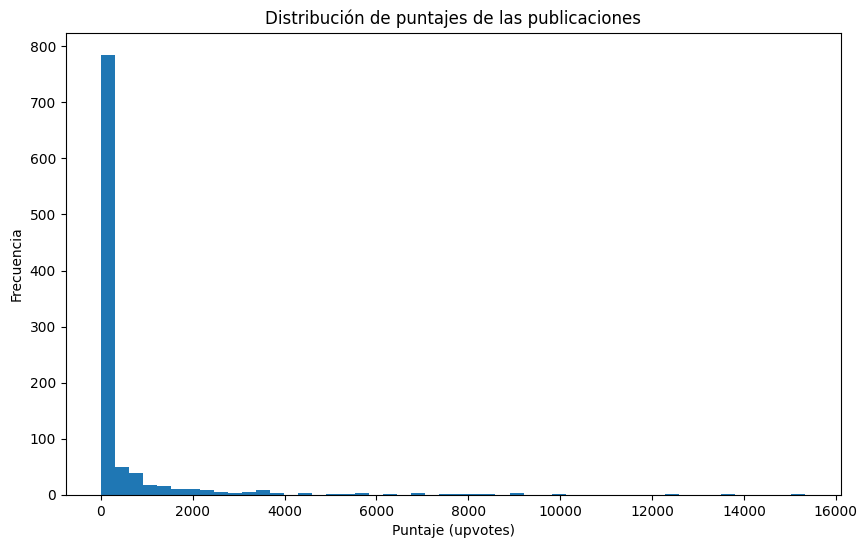

In [16]:
# Graficar la distribución de puntajes
plt.figure(figsize=(10,6))
df['score'].plot(kind='hist', bins=50)
plt.title('Distribución de puntajes de las publicaciones')
plt.xlabel('Puntaje (upvotes)')
plt.ylabel('Frecuencia')
plt.show()

